**Importando as bibliotecas necessáras**
- Esse é um problema de ***classificação***, que trata de classificar qual falha irá aparesentar em uma máquina

In [1]:
import pandas as pd
from sklearn import preprocessing
from pycaret.classification import *

**Importando os dados**

In [2]:
df = pd.read_csv('C:\\Desafio Cientista de Dados - Indicium\\Dados\\Processados\\manutencao_preventiva_treino_proc.csv')
df

,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type
0,M,298.1,308.6,1551,42.8,0,No Failure
1,L,298.2,308.7,1408,46.3,3,No Failure
2,L,298.2,308.7,1408,40.0,9,No Failure
3,M,298.1,308.6,1425,41.9,11,No Failure
4,L,298.1,308.6,1558,42.4,14,No Failure
...,...,...,...,...,...,...,...
6662,L,298.8,308.3,1634,27.9,12,No Failure
6663,M,298.8,308.4,1604,29.5,14,No Failure
6664,H,298.9,308.4,1632,31.8,17,No Failure
6665,H,299.0,308.7,1408,48.5,25,No Failure


**Transformando dados categóricos em numéricos**

In [3]:
label_encoder = preprocessing.LabelEncoder()

In [4]:
df['type']= label_encoder.fit_transform(df['type'])

In [6]:
df

,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type
0,2,298.1,308.6,1551,42.8,0,No Failure
1,1,298.2,308.7,1408,46.3,3,No Failure
2,1,298.2,308.7,1408,40.0,9,No Failure
3,2,298.1,308.6,1425,41.9,11,No Failure
4,1,298.1,308.6,1558,42.4,14,No Failure
...,...,...,...,...,...,...,...
6662,1,298.8,308.3,1634,27.9,12,No Failure
6663,2,298.8,308.4,1604,29.5,14,No Failure
6664,0,298.9,308.4,1632,31.8,17,No Failure
6665,0,299.0,308.7,1408,48.5,25,No Failure


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6667 entries, 0 to 6666
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   type                   6667 non-null   int64  
 1   air_temperature_k      6667 non-null   float64
 2   process_temperature_k  6667 non-null   float64
 3   rotational_speed_rpm   6667 non-null   int64  
 4   torque_nm              6667 non-null   float64
 5   tool_wear_min          6667 non-null   int64  
 6   failure_type           6667 non-null   object 
dtypes: float64(3), int64(3), object(1)
memory usage: 364.7+ KB


### AutoML com Pycaret

In [8]:
df.columns

Index(['type', 'air_temperature_k', 'process_temperature_k',
       'rotational_speed_rpm', 'torque_nm', 'tool_wear_min', 'failure_type'],
      dtype='object')

**Definindo todas o pipeline com alguns parâmetros de configuração**

In [9]:
s = setup( df[['type', 'air_temperature_k', 'process_temperature_k',
       'rotational_speed_rpm', 'torque_nm', 'tool_wear_min', 'failure_type']]
          ,target = 'failure_type'
          ,numeric_features = ['type', 'air_temperature_k', 'process_temperature_k',
       'rotational_speed_rpm', 'torque_nm', 'tool_wear_min']
          ,train_size = 0.8
          ,normalize = True
          ,normalize_method = "minmax"
          ,data_split_stratify = True
          ,fix_imbalance = True
          ,fold_shuffle=True
         )

,Description,Value
0,session_id,6644
1,Target,failure_type
2,Target Type,Multiclass
3,Label Encoded,"Heat Dissipation Failure: 0, No Failure: 1, Overstrain Failure: 2, Power Failure: 3, Random Failures: 4, Tool Wear Failure: 5"
4,Original Data,"(6667, 7)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


**Função que realiza o treino e avalia o desempenho de cada modelo usando validação cruzada, e ordena do maior para o menor desempenho levando em consideração a métrica curva ROC**

In [10]:
best = compare_models(fold = 5, sort ='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6450,0.9514,0.7281,0.9703,0.7615,0.1207,0.2457,5.0040
rf,Random Forest Classifier,0.9550,0.9508,0.5985,0.9748,0.9640,0.5061,0.5246,2.3140
lightgbm,Light Gradient Boosting Machine,0.9621,0.9492,0.6157,0.9790,0.9700,0.5606,0.5746,1.1580
et,Extra Trees Classifier,0.9586,0.9450,0.5394,0.9713,0.9644,0.5019,0.5107,0.8500
gbc,Gradient Boosting Classifier,0.9256,0.9396,0.6640,0.9765,0.9489,0.4026,0.4566,21.4320
lda,Linear Discriminant Analysis,0.5393,0.9336,0.7179,0.9703,0.6757,0.0882,0.2069,0.0460
nb,Naive Bayes,0.5487,0.9245,0.6556,0.9689,0.6855,0.0853,0.2003,0.0340
knn,K Neighbors Classifier,0.8789,0.8551,0.5672,0.9646,0.9164,0.2562,0.3220,0.4120
dt,Decision Tree Classifier,0.9460,0.8145,0.5570,0.9711,0.9577,0.4427,0.4649,0.1380
qda,Quadratic Discriminant Analysis,0.6745,0.7554,0.6368,0.7805,0.7189,0.2052,0.2914,0.0440


**Seleciona o modelo de Regressão Logística, que teve o melhor desempenho**


Vantagens


    - A regressão logística é um algoritmo simples de ser implementado e costuma ser bem eficiente.
    - É rápido para classificar registros desconhecidos.
    - Não é um algoritmo tão complexo.
    
    
Desvantagens


    - A regressão logística requer média ou nenhuma multicolinearidade entre as variáveis independentes.
    - A principal limitação da Regressão Logística é a suposição de linearidade entre a variável dependente e as variáveis independentes.

In [11]:
lr = create_model('lr', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6251,0.9455,0.6489,0.9684,0.7466,0.1072,0.2248
1,0.6382,0.9511,0.8104,0.9703,0.7555,0.1197,0.2475
2,0.6270,0.9625,0.7058,0.9720,0.7487,0.1187,0.2477
3,0.6914,0.9370,0.7068,0.9696,0.7953,0.1380,0.2611
4,0.6435,0.9608,0.7684,0.9712,0.7613,0.1201,0.2474
Mean,0.6450,0.9514,0.7281,0.9703,0.7615,0.1207,0.2457
Std,0.0242,0.0095,0.0559,0.0012,0.0177,0.0099,0.0117


**Gráfico do desempenho da curva ROC usando regressão logística**

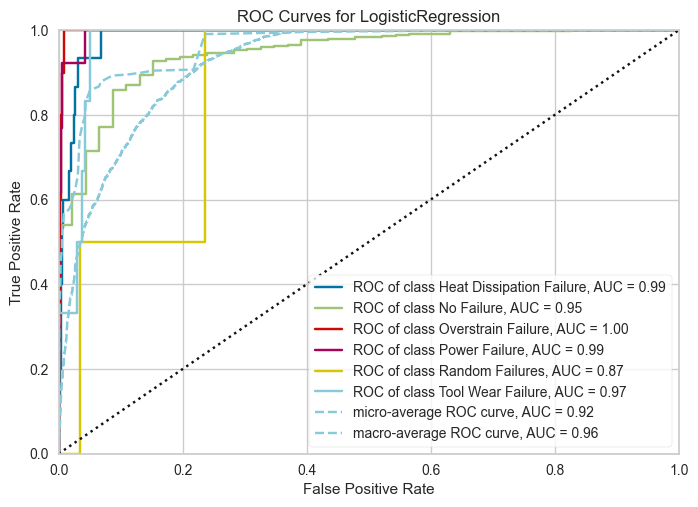

In [12]:
plot_model(lr, plot = 'auc')

## Tunning dos parâmetros

**Função que altera os parâmetros, afim de obter o melhor desempenho do algoritmo selecionado**

In [13]:
lr_tuned = tune_model(lr, choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7228,0.9154,0.6232,0.9689,0.8204,0.1422,0.2519
1,0.6049,0.9833,0.6827,0.9739,0.7340,0.1096,0.2398
2,0.6554,0.9556,0.7741,0.9704,0.7688,0.1317,0.2643
3,0.6585,0.9592,0.8532,0.9735,0.7742,0.1231,0.2529
4,0.6341,0.9580,0.6601,0.9719,0.7569,0.1101,0.2338
5,0.6811,0.9725,0.7456,0.9785,0.7943,0.1370,0.2712
6,0.7036,0.9265,0.7412,0.9747,0.8085,0.1435,0.2727
7,0.6998,0.9387,0.6988,0.9730,0.8047,0.1487,0.2777
8,0.6585,0.9750,0.8750,0.9768,0.7763,0.1340,0.2718


**Gráfico do desempenho da curva ROC usando regressão logística com modificações nos parâmetros**
- Podemos concluir que não houve uma melhora significativa

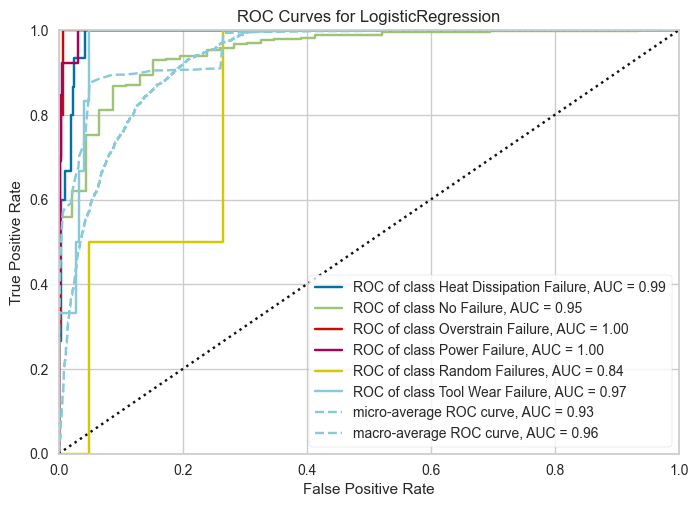

In [14]:
plot_model(lr_tuned, plot = 'auc')

**Matriz de confunsão**
- A classe "Random Failures" foi classificada 50% das vezes errada, indica que precisa passar por trabalhos futuros
- A classe "No Failure" foi classificada 36% das vezes errada, indica que precisa passar por trabalhos futuros

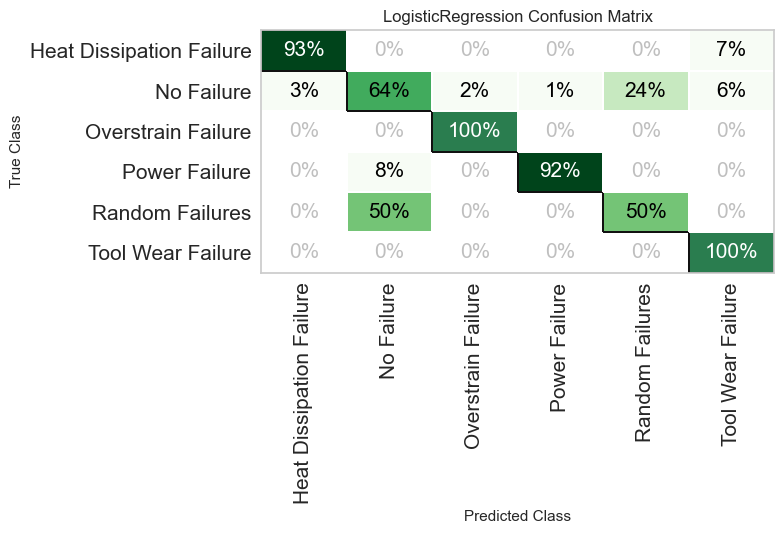

In [15]:
plot_model(lr_tuned, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

**O gráfico abaixo apresenta a importância de cada feature. Quanto maior, mais o modelo leva em consideração para precer determinada classe.**
 
- As features que o modelo está levando mais em consideração são "rotational_speed_rpm", "air_temperature_k" e "Process_temperature_k"

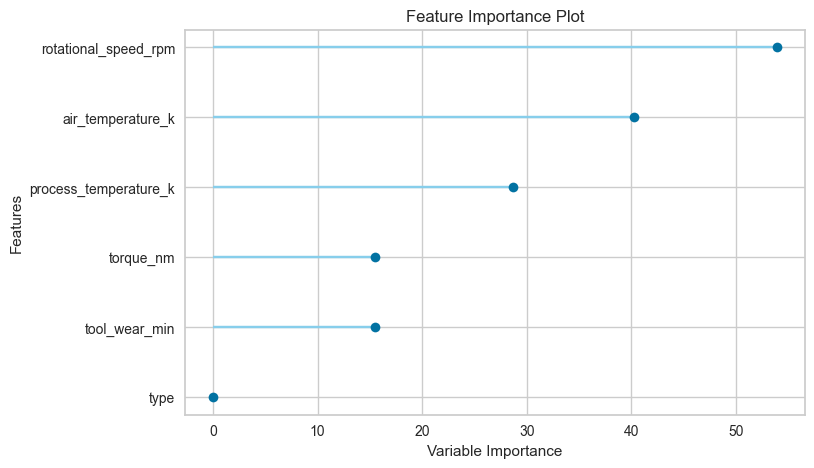

In [16]:
plot_model(lr_tuned, plot='feature')

### Finalizando e Salvando o modelo

In [18]:
final_model = finalize_model(lr_tuned)

In [19]:
save_model(final_model,'model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['type',
                                                           'air_temperature_k',
                                                           'process_temperature_k',
                                                           'rotational_speed_rpm',
                                                           'torque_nm',
                                                           'tool_wear_min'],
                                       target='failure_type',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imput...
                 ('feature_select', '